# Customer Segmentation using K-Means Clustering

'Customer Segmentation using K-Means', involves using the K-Means algorithm to group customers into distinct segments based on their purchasing behavior. The goal of this project is to help businesses better understand their customer base and tailor their marketing strategies and product offerings to specific segments.
To accomplish this, I performed data cleaning and preprocessing to ensure that the data is in a usable format for machine learning models. You may also need to perform exploratory data analysis to gain insights into the relationships between the input features and the target variable (customer segments).

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

# Loading the Dataset

In [3]:
df = pd.read_csv('E:\ML_Projects_New\Customer Segmentation using K-Means Clustering\Mall_Customers.csv')

In [4]:
#first five rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#last five rows
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
#finding the number of rows and columns
df.shape

(200, 5)

- Dataset has 200 rows and 5 columns

In [7]:
#getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#checking for the missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- Dataset does not have missing values

In [9]:
df.duplicated().value_counts()

False    200
dtype: int64

- dataset does not have any duplicate values

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

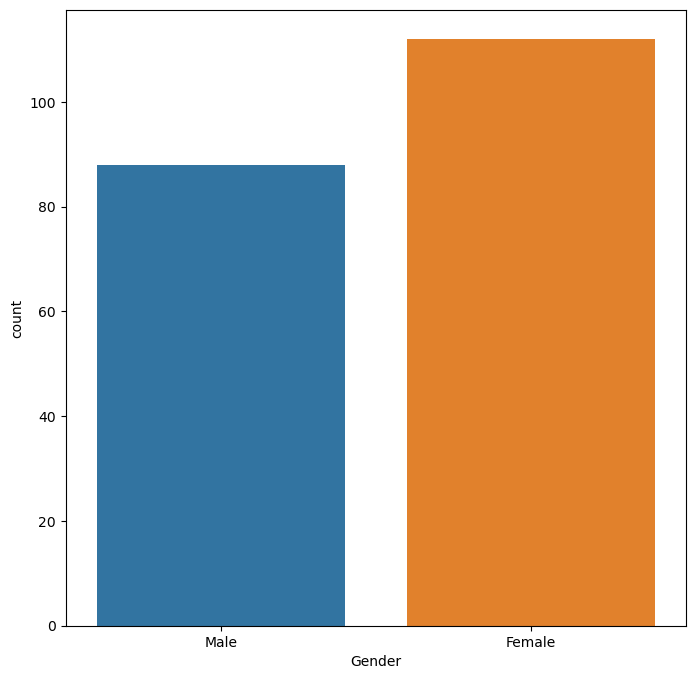

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x='Gender', data=df)

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

- There are more counts of female than that of male

<Figure size 800x800 with 0 Axes>

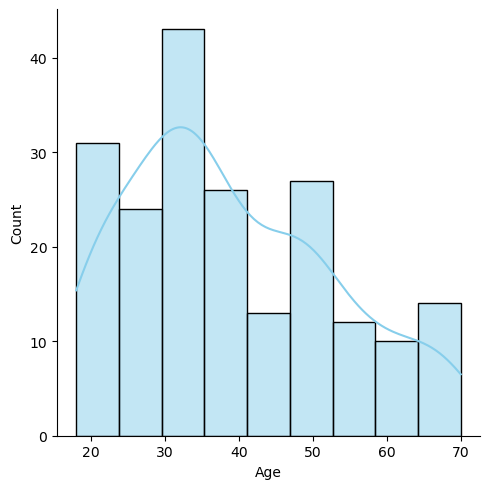

In [12]:
plt.figure(figsize=(8,8))
sns.displot(x=df['Age'], kde=True, color='skyblue')

- Age group between 30 - 40  are more. 
- After that there are age group of 20 - 25 more visiting the mall.

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

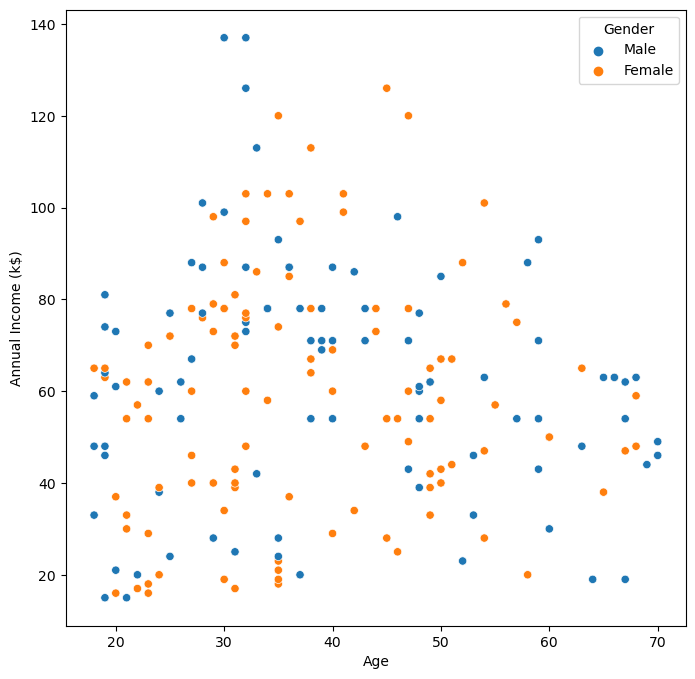

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='Age', y='Annual Income (k$)', hue='Gender')

- Age Group between 30 - 50 have higher salary and most of them are male.
- As the age increases the annual salary decreases or it could be they tend to appear less in the mall.

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

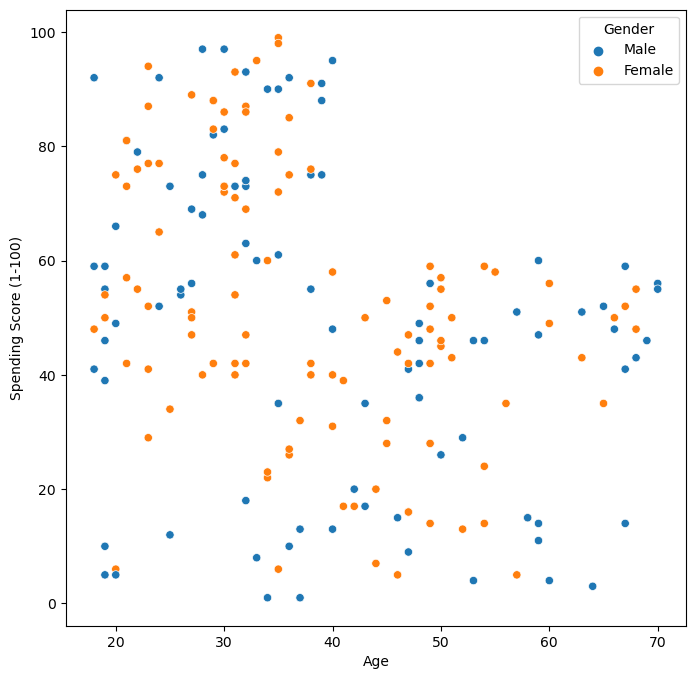

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='Age', y='Spending Score (1-100)', hue='Gender')

- Age segment of between 20 - 40 tend to spend more.
- And there is a sudden drop once the person enters the 50s.

# Choosing the Annual Income Column and Spending Score Column

In [15]:
X = df.iloc[:,[3,4]].values

In [16]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Choosing the number of clusters

- WCSS -> Within Clusters Sum of Squares

In [17]:
#find minimum WCSS value for different number of cluster

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

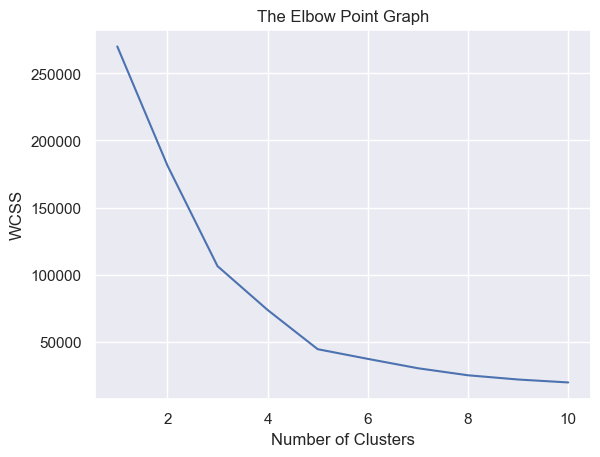

In [18]:
#plot an eblow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- So the optimum value for clusters in '5'

# Training the K-Means Clustering

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)


#return a label for each data point based on their cluster
Y= kmeans.fit_predict(X)
print(Y)

C:\Users\Nehak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualising all the Clusters

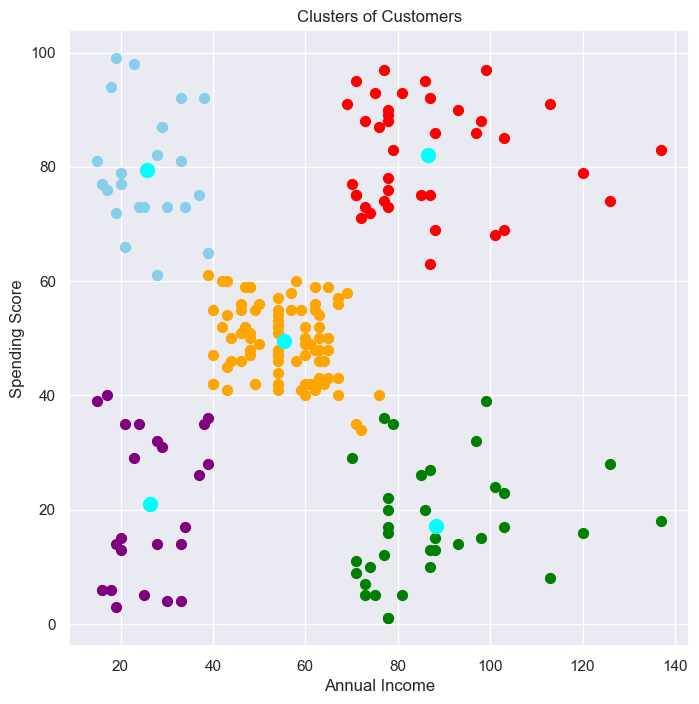

In [25]:
#plotting all the Clusters and their Centroid

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='skyblue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='purple', label='Cluster 5')


#plotting the centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Insights

- Skyblue cluster is a group of people which does not have a High Annual Income but have a Excellent Spending Score.
- Purple cluster is a group of people which does not have a High Annual Income and also have a Satisfactory Spending Score.
- Green cluster is a group of  people which does have a High Annual Income but tend to spend less and are more saving orriented.
- Red cluster is a group of people which does have a High Annual Income and also have  High Spending Score and are our Tier 1 Cluster.
- Orange cluster is a group of people who have a moderate Annual Income and have a Moderate Spending Score to them.

# Tiers based on Cluster

- Tier 1: Red & Green
- Tier 2: Orange & Skyblue
- Tier 3: Purple